In [ ]:
import numpy as np
def create_cyclic_array(size):
    # 0から359までの数値を含む配列を作成
    array = np.arange(size) % 360
    return array

# 例えば、1000要素の配列を作成
size = 371
cyclic_array = create_cyclic_array(size)

print(len(cyclic_array))

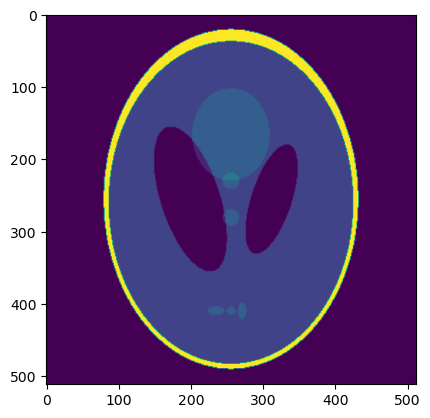

In [12]:
import torch  
import matplotlib.pyplot as plt
phantom=np.load("phantom.npy",allow_pickle=True)
plt.imshow(phantom)
image_size = phantom.shape[0]
# print(image_size)
# define measuring angles
angles = np.linspace(0, np.pi, image_size, endpoint=False)
# print(angles)
device = torch.device('cuda')
det_count = int(np.sqrt(2)*image_size + 0.5)
x = torch.FloatTensor(phantom).to(device)

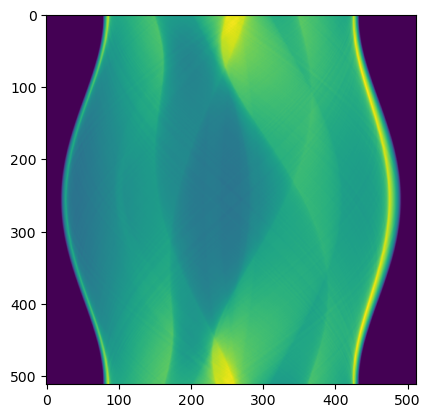

In [14]:
from torch_radon import Radon, RadonFanbeam
# instantiate Radon transform
radon = Radon(image_size, angles, clip_to_circle=False)

sinogram = radon.forward(x)
plt.imshow(sinogram.cpu())

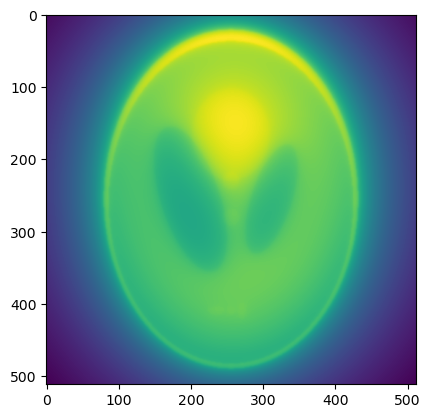

In [16]:
tomography = radon.backward(sinogram)
plt.imshow(tomography.cpu())